In [2]:
%pylab inline

import IPython.display as display
import ipywidgets as widgets
import time
import threading

Populating the interactive namespace from numpy and matplotlib


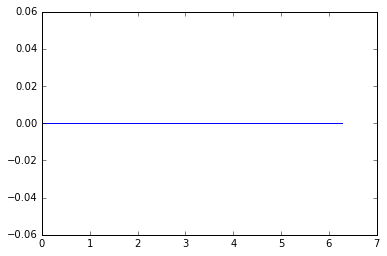

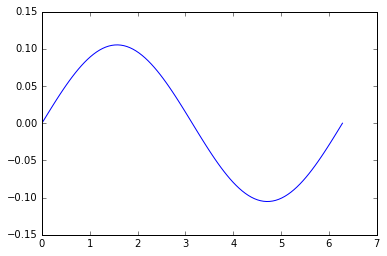

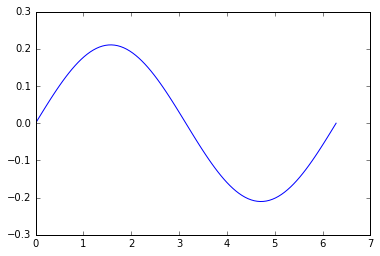

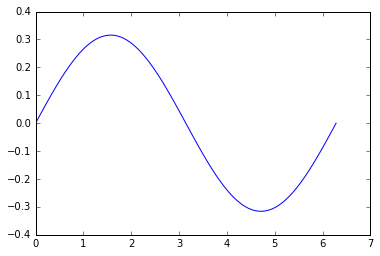

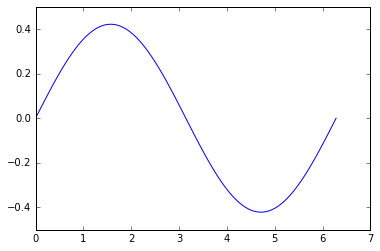

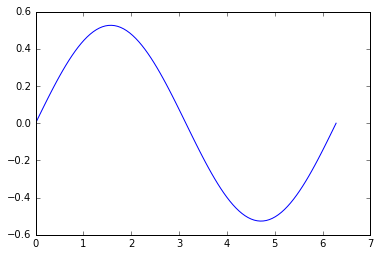

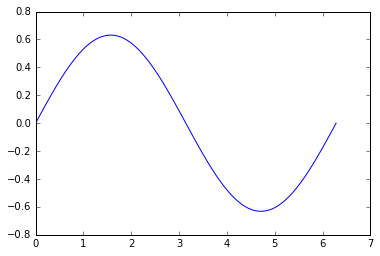

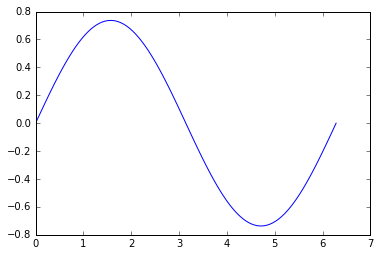

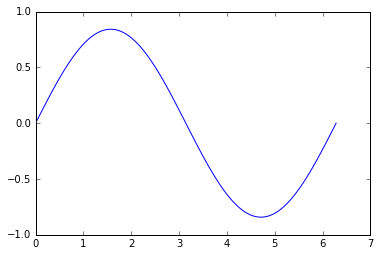

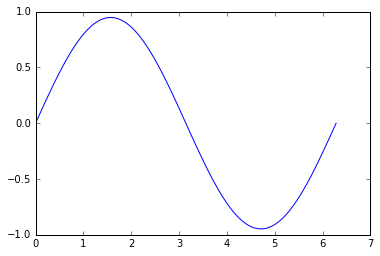

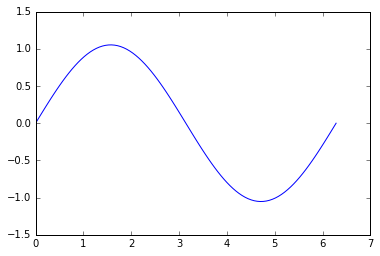

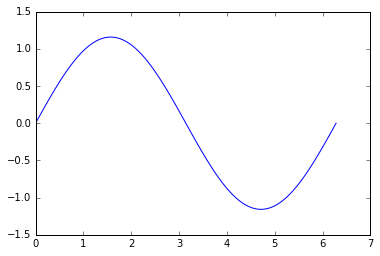

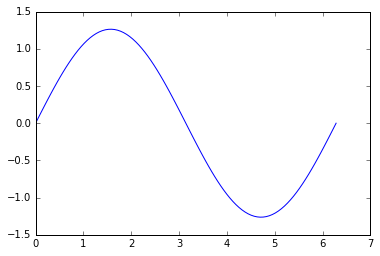

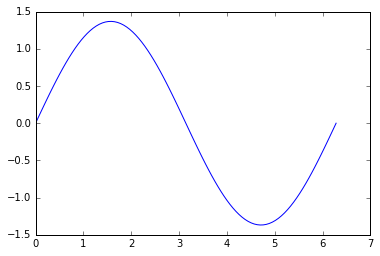

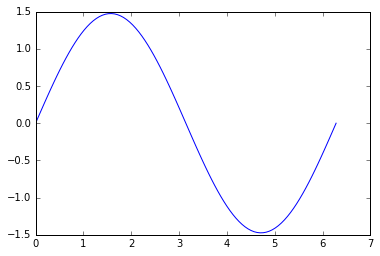

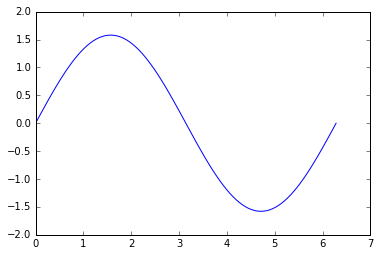

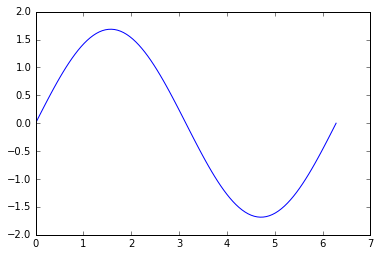

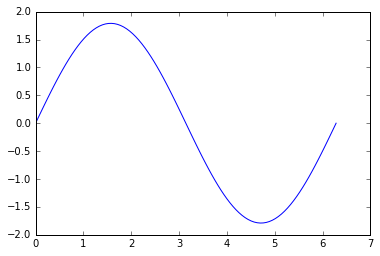

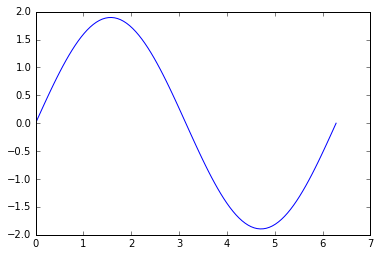

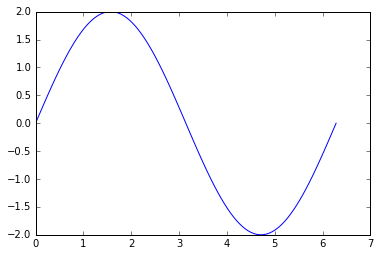

In [27]:
x = linspace(0, 2*pi, 100)


def plotter(a):
    f = figure()
    ax = f.add_subplot(111)
    y = a * sin(x)
    ax.plot(x,y)
    f.show()
    
def animate(func, steps, period=10):
    try:
        for i in steps:
            plotter(i)
            display.clear_output(wait=True)
            display.display(gcf())
            time.sleep(period/len(steps))
    except KeyboardInterrupt:
        pass
    finally:
        display.clear_output(wait=True)
        
animate(plotter, linspace(0, 2, 20), 4)

<IPython.core.display.Javascript object>


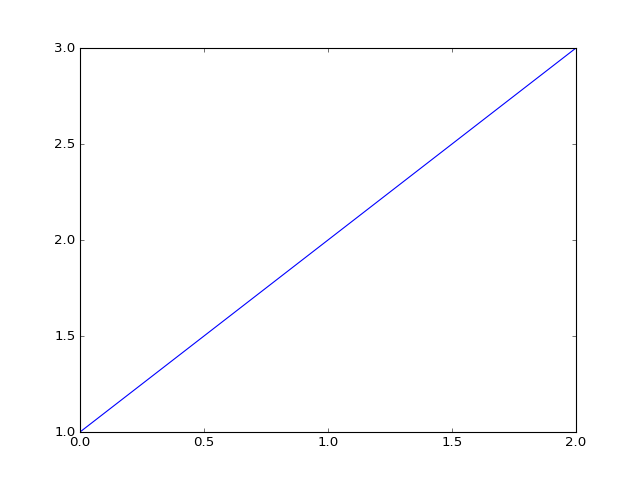

In [10]:
%matplotlib notebook
from ipywidgets import HBox, Button
import ipywidgets
from IPython.display import display
from matplotlib import pyplot as plt

red = Button(description='Make Red')
green = Button(description='Make Green')

fig, ax = plt.subplots()
ax.plot([1,2,3])

def make_red(button):
    ax.lines[0].set_color('red')
    ax.figure.canvas.draw()

def make_green(button):
    ax.lines[0].set_color('green')
    ax.figure.canvas.draw()

red.on_click(make_red)
green.on_click(make_green)
display(HBox([red, green]))

In [29]:
!pip install --upgrade traitlets

Requirement already up-to-date: ipython-genutils in c:\users\william\anaconda3\lib\site-packages (from traitlets)
Requirement already up-to-date: decorator in c:\users\william\anaconda3\lib\site-packages (from traitlets)
  Found existing installation: traitlets 4.0.0
    Uninstalling traitlets-4.0.0:
      Successfully uninstalled traitlets-4.0.0


    DEPRECATION: Uninstalling a distutils installed project (traitlets) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
You are using pip version 7.1.2, however version 8.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [29]:
import ipywidgets as widgets
import traitlets
from traitlets import CInt, Unicode


class SpinnerWidget(widgets.DOMWidget):
    _view_name = Unicode('SpinnerView').tag(sync=True)
    value = CInt().tag(sync=True)

In [28]:
%%javascript
require(["jupyter-js-widgets"], function(widgets) {
    console.log('test');

    var SpinnerView = widgets.DOMWidgetView.extend({
        render: function() { 

            var that = this;
            this.$input = $('<input />');
            this.$el.append(this.$input);
            this.$spinner = this.$input.spinner({
                change: function( event, ui ) {
                    that.handle_spin(that.$spinner.spinner('value'));
                },
                spin: function( event, ui ) {
                    //ui.value is the new value of the spinner
                    that.handle_spin(ui.value);
                }
            });
            
            this.value_changed();
            this.model.on('change:value', this.value_changed, this);
        },
        
        value_changed: function() {
            this.$spinner.spinner('value', this.model.get('value'));
        },
        
        handle_spin: function(value) {
            this.model.set('value', value);
            this.touch();
        },
    });
    
    widgets.ManagerBase.register_widget_view('SpinnerView', SpinnerView);
});

<IPython.core.display.Javascript object>

In [30]:
w = SpinnerWidget(value=5)
w

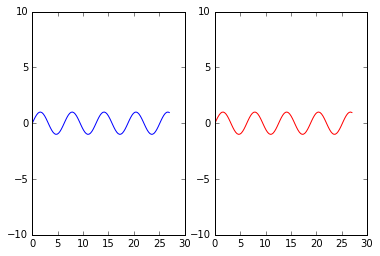

In [15]:


# progress = widgets.FloatSlider(start=0, stop=10, value=0)


steps = arange(0, 30, 1)
speed = 4 # Hz
progress = widgets.FloatProgress(start=steps[0], stop=steps[-1], value=0, description=' ')

playing = False
index = 0
def someFunc():
    global index
    while index < len(steps):
        with mutex:
            if not playing:
                break
            val = steps[index]
            progress.value = val
            progress.description = '{:.1f}'.format(progress.value)
            index += 1
        time.sleep(1/speed)
        
t1 = None
mutex = threading.Semaphore(1)


play = widgets.Button(description='Play')
@play.on_click
def event_handler(*args):
    global playing, t1
    playing = True
    pause.disabled = False
    play.disabled = True
    t1 = threading.Thread(target=someFunc)
    t1.start()


pause = widgets.Button(description='Pause')
@pause.on_click
def event_handler(*args):
    global playing
    with mutex:
        playing = False
        pause.disabled = True
        play.disabled = False
    t1.join()
    
    
reset = widgets.Button(description='Reset')
@reset.on_click
def event_handler(*args):
    global index
    index = 0

h = widgets.HBox([play, pause, reset])


def do(a):
    f = figure()
    ax = f.add_subplot(121)
    x = linspace(0, a, 100)
    y = sin(x)
    ax.plot(x,y)
    ax.set_ylim(-10, 10)
    ax.set_xlim(0, 30)
    ax = f.add_subplot(122)
    
    x = linspace(0, a, 100)
    y = sin(x)
    ax.plot(x,y,'r')
    ax.set_ylim(-10, 10)
    ax.set_xlim(0, 30)
    
def wrapper(**kwargs):
    do(**kwargs)
    show();
    
z = widgets.interactive(wrapper, a=progress)
    
v = widgets.VBox([h, z])
display.display(v);



